### Linear Regression

#### Predict House Price Based on Boston Housing Dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston) and has been used extensively throughout the literature to benchmark algorithms. 

There are 14 attributes in each case of the dataset. They are:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars.
- PTRATIO - pupil-teacher ratio by town
- BLACK - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000 dollars


# 3.6.1 Importing Libraries

In [1]:
# Import useful libararies used for data management

import numpy as np
import pandas as pd

In [2]:
# load Boston Dataset
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
data = pd.read_csv('Boston.csv', index_col=0)

# display the first 10 records
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


**Now let's fit a simple linear model (OLS - for "ordinary least squares" method) with MEDV as the target variable and the others as the predictors:**

In [4]:
# use the first 13 attributes as independent varibles 
features = list(data.columns[0:13])

features

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [5]:
# use the names of attributes to split them into independent variables X and target variable y

X = data[features]
y = data['medv']

#### Split Data

- We will randomly split the data into training dataset (10%) and testing dataset (90%) (**the purpose of using a small training dataset is to test overfitting**)
- Training dataset is used to train the model, in this case, we will train linear regression model
- Testing dataset is for testing purpose. We can compare the predicted value against the true value in order to evaluate the model performance

In [6]:
#import functions for data split

from sklearn.model_selection import train_test_split

# test_size=0.9 means 90% testing dataset. In order to have the same split result, let’s use the same random_state
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

In [7]:
# Show the descriptive statistics of the training dataset (before normalization)
X_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.153356,13.640000,10.512600,0.040000,0.538900,6.217420,64.206000,4.038956,9.020000,409.720000,18.236000,366.635000,12.703600
std,8.086289,25.301859,7.534869,0.197949,0.113324,0.569243,30.267491,1.935017,8.589243,182.086662,2.192358,74.413212,7.562336
min,0.010960,0.000000,0.460000,0.000000,0.389000,4.926000,6.600000,1.460800,1.000000,224.000000,12.600000,2.520000,2.870000
25%,0.057767,0.000000,4.600000,0.000000,0.439000,5.941750,36.775000,2.288875,4.000000,271.500000,16.600000,378.735000,6.397500
50%,0.160510,0.000000,7.625000,0.000000,0.515000,6.197000,74.650000,3.548750,5.000000,305.000000,18.850000,393.370000,10.505000
75%,2.785155,18.125000,18.100000,0.000000,0.609000,6.449250,87.975000,5.640050,6.750000,666.000000,20.200000,396.192500,17.872500
max,41.529200,80.000000,27.740000,1.000000,0.871000,7.875000,100.000000,7.396700,24.000000,711.000000,21.000000,396.900000,30.590000


In [8]:
# Show the descriptive statistics of the test dataset (before normalization)
X_test.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.00000,456.000000
mean,3.663981,11.114035,11.205219,0.072368,0.556427,6.292004,69.053947,3.768298,9.607456,408.074561,18.479605,355.58182,12.647522
std,8.663103,23.111368,6.787835,0.259382,0.116145,0.715872,27.900611,2.123861,8.727465,167.198372,2.162996,92.96361,7.102074
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.32000,1.730000
25%,0.082973,0.000000,5.287500,0.000000,0.453000,5.883000,45.625000,2.070275,4.000000,280.750000,17.400000,375.30000,7.092500
50%,0.284560,0.000000,9.690000,0.000000,0.538000,6.208500,77.700000,3.142300,5.000000,334.500000,19.050000,391.24000,11.430000
75%,3.694070,12.500000,18.100000,0.000000,0.625750,6.632000,94.425000,5.104475,24.000000,666.000000,20.200000,396.23250,16.910000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.90000,37.970000


In [9]:
from sklearn import preprocessing
# Apply z-score normalization on all explanatory attributes

zscore_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(zscore_scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(zscore_scaler.transform(X_test), columns = X_train.columns)

**It is okay to have warnings, we can simply ignore them here. Alternatively, you can use .astype() function to covert the int64 type to float64 type.**
- Now, we are ready to check the statistics of the normalized datasets.
- Note: the means of attributes in X_train should be 0 but the means of attributes in X_test may not be equal to 0. Think about why.

In [10]:
# Show the descriptive statistics of the normalized training dataset
X_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-3.885781e-17,-5.773160e-17,1.421085e-16,-4.996004e-17,-4.185541e-16,5.284662e-16,-1.043610e-16,-3.863576e-16,-1.110223e-18,-1.088019e-16,-2.819966e-16,-6.994405e-16,-1.998401e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-3.925533e-01,-5.445640e-01,-1.347689e+00,-2.041241e-01,-1.336183e+00,-2.291696e+00,-1.922553e+00,-1.345896e+00,-9.432057e-01,-1.030309e+00,-2.596848e+00,-4.942828e+00,-1.313541e+00
25%,-3.867060e-01,-5.445640e-01,-7.926652e-01,-2.041241e-01,-8.904914e-01,-4.891916e-01,-9.154870e-01,-9.136091e-01,-5.903856e-01,-7.667958e-01,-7.538047e-01,1.642564e-01,-8.423485e-01
50%,-3.738712e-01,-5.445640e-01,-3.871224e-01,-2.041241e-01,-2.130405e-01,-3.623641e-02,3.485599e-01,-2.559062e-01,-4.727789e-01,-5.809496e-01,2.829071e-01,3.629252e-01,-2.936819e-01
75%,-4.599627e-02,1.790593e-01,1.017195e+00,-2.041241e-01,6.248593e-01,4.113951e-01,7.932708e-01,8.358322e-01,-2.669672e-01,1.421751e+00,9.049342e-01,4.012404e-01,6.904450e-01
max,4.793974e+00,2.649360e+00,2.309569e+00,4.898979e+00,2.960282e+00,2.941467e+00,1.194595e+00,1.752871e+00,1.761748e+00,1.671395e+00,1.273543e+00,4.108446e-01,2.389208e+00


In [11]:
# Show the descriptive statistics of the normalized test dataset
X_test.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,0.063788,-0.100847,0.092855,0.165179,0.156232,0.132354,0.161796,-0.141294,0.069089,-0.009128,0.112244,-0.150046,-0.007491
std,1.082209,0.922699,0.910002,1.323651,1.035300,1.270355,0.931160,1.108736,1.026408,0.927558,0.996624,1.261973,0.948672
min,-0.393133,-0.544564,-1.310151,-0.204124,-1.371838,-4.713964,-2.046037,-1.518795,-0.943206,-1.235572,-2.596848,-4.972693,-1.465818
25%,-0.383557,-0.544564,-0.700496,-0.204124,-0.765698,-0.593447,-0.620126,-1.027727,-0.590386,-0.715480,-0.385196,0.117627,-0.749513
50%,-0.358375,-0.544564,-0.110281,-0.204124,-0.008022,-0.015829,0.450351,-0.468089,-0.472779,-0.417294,0.375059,0.334011,-0.170123
75%,0.067547,-0.045513,1.017195,-0.204124,0.774166,0.735695,1.008534,0.556242,1.761748,1.421751,0.904934,0.401783,0.561877
max,10.721131,3.447840,2.309569,4.898979,2.960282,4.547439,1.194595,4.222007,1.761748,1.671395,1.734304,0.410845,3.375004


In [12]:
# Import Linear Regression Model from sklearn
from sklearn.linear_model import LinearRegression

# Define model to be linear regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lm = LinearRegression()

# train model using training dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
# show the intercept of the trained model (Theta_0)
lm.intercept_

21.267999999999994

In [14]:
# show the coefficients of independent attributes
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
crim,-0.770339
zn,1.048095
indus,0.751485
chas,0.845036
nox,0.641841
rm,3.714814
age,-1.535696
dis,-1.958528
rad,0.060468
tax,-1.868513


### Model Testing

- We just build a linear regression model, what would be the predicting result on testing dataset?

In [15]:
# test model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
y_pred = lm.predict(X_test)

In [16]:
# Compare the predicted values to actual values.
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
330,22.6,23.967207
372,50.0,19.102105
220,23.0,29.459712
404,8.3,9.360911
79,21.2,20.122184
...,...,...
203,42.3,38.374215
32,14.5,16.382959
33,13.2,11.312582
128,16.2,16.004925


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# evaluate result 
# show MSE(mean sqaured error)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

Mean Squared Error: 30.346947304117954
Root Mean Squared Error: 5.5088063411339805
Mean Absolute Error: 3.5628128097319016


### LASSO Regression

- **We will do Lasso regression next to see how it controls model complexity and eliminate not informative features.**

In [18]:
# Import Lasso Model from sklearn
from sklearn.linear_model import Lasso

# Define model to be Lasso, set alpha=0.1 (alpha is the regularization parameter)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
lasso = Lasso(alpha = 0.1)

# train model using training dataset
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [19]:
# show the intercept of the trained model (Theta_0)
lasso.intercept_

21.267999999999994

In [20]:
# show the coefficients of independent attributes
# coefficient = 0, the attribute is removed from the regression, because it has no impact on the result
coeff_df = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])  

coeff_df 

,Coefficient
crim,-0.655123
zn,0.826258
indus,0.000000
chas,0.850914
nox,0.148151
rm,3.226584
age,-1.064523
dis,-1.426328
rad,-0.000000
tax,-0.693057


**Note that both the coefficients of 'indus' and 'rad' become zero.**

In [21]:
# test model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso.predict
y_pred = lasso.predict(X_test)

In [22]:
# evaluate result 
# show MSE(mean sqaured error)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

Mean Squared Error: 28.468212375688427
Root Mean Squared Error: 5.335561111606578
Mean Absolute Error: 3.4087458421688503


**Note that Lasso regression performs better on all the three performance metrics!**

**Let's compare the magnitudes of coefficients under linear regression and Lasso regression.**

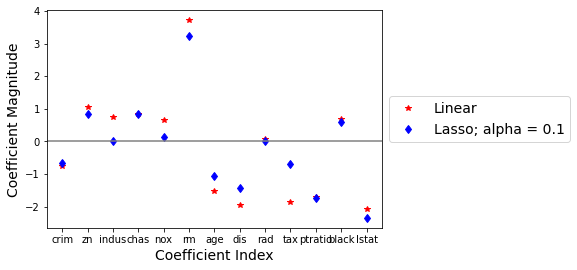

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(lm.coef_,linestyle='none',marker='*',markersize=6,color='red',label='Linear') 

plt.plot(lasso.coef_,linestyle='none',marker='d',markersize=6,color='blue',label='Lasso; alpha = 0.1') 

# draw a horizontal line at 0.
plt.axhline(y=0, color='grey', linestyle='-')

plt.xlabel('Coefficient Index',fontsize=14)
plt.ylabel('Coefficient Magnitude',fontsize=14)
#plt.legend(fontsize=13,loc=10)
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(np.arange(13), (features), fontsize=10)
plt.show()

**Next, we will explore how model performance of Lasso varies with the value of alpha (regularization parameter)**

In [24]:
# create an array that holds the alpha values from 0.01 to 0.30
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
alpha_ = np.linspace(.01,0.3,30)
alpha_

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ])

In [25]:
# generate two empty lists to store the model performance under different tree max_depths
train_results =[]
test_results = []

# create a loop to try out all the values of alpha in the array above
for a in alpha_:
    
    # train the model (with the specific alpha value)
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    
    # evalute model performance on training set using root mean squared error as performance metric 
    train_pred = lasso.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    # append the result to the list train_results
    train_results.append(rmse)
    
    # evalute model performance on training set using root mean squared error as performance metric        
    y_pred = lasso.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # append the result to the list train_results
    test_results.append(rmse)

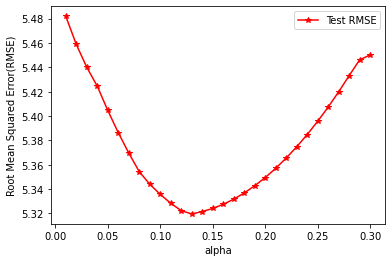

In [33]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline

#line1, = plt.plot(alpha_, train_results, marker='o', color='b', label='Train RMSE')
line2, = plt.plot(alpha_, test_results, marker='*', color='r', label='Test RMSE')
plt.legend()
plt.ylabel('Root Mean Squared Error(RMSE)')
plt.xlabel('alpha')
plt.show()

### Decision Tree Regressor

- Next, we show how to perform regression based on decision tree regressor (FYI).

In [27]:
# Import Decision Tree Regresor from sklearn

from sklearn.tree import DecisionTreeRegressor

# Define model to be decision tree regressor
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

model = DecisionTreeRegressor()

# train model using training dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.fit

model.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
# test model
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.predict
y_pred = model.predict(X_test)


# Compare the predicted values to actual values.
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
330,22.6,19.2
372,50.0,22.6
220,23.0,23.8
404,8.3,14.6
79,21.2,24.8
...,...,...
203,42.3,31.1
32,14.5,22.2
33,13.2,14.1
128,16.2,12.5


In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# evaluate result 
# show MSE(mean sqaured error)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

Mean Squared Error: 59.30030701754386
Root Mean Squared Error: 7.700669257768695
Mean Absolute Error: 5.001315789473684
